In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/antra0497/Udacity-Predicting-Boston-Housing-Prices/refs/heads/master/housing.csv')

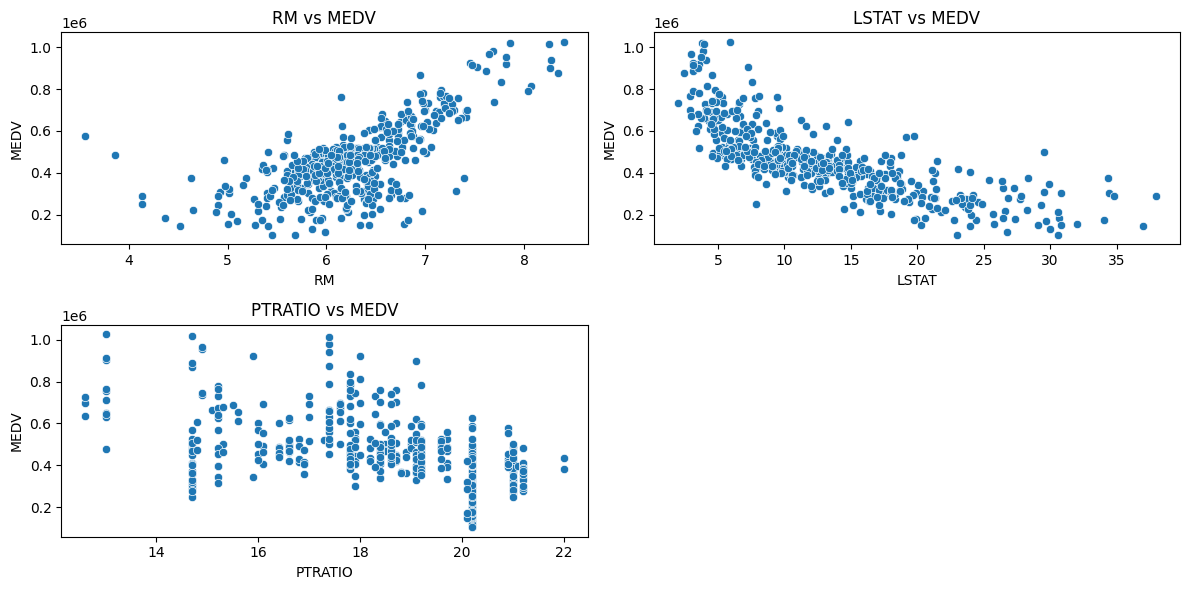

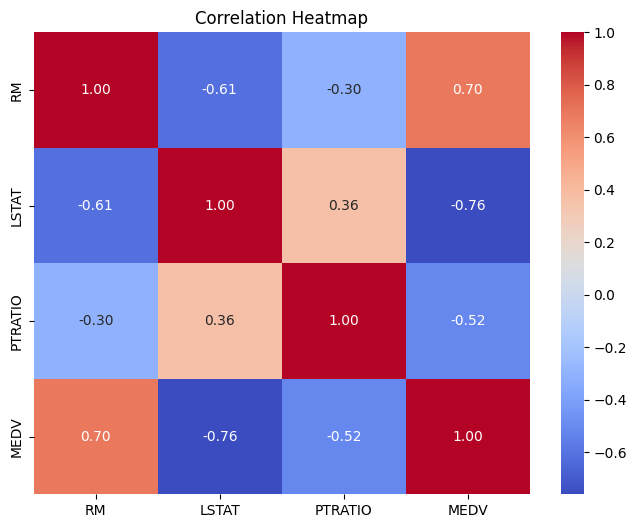

In [16]:
plt.figure(figsize=(12, 6))

# Scatter plots for each feature vs target
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df[col], y=df['MEDV'])
    plt.title(f'{col} vs MEDV')

plt.tight_layout()
plt.show()

# Correlation heatmap to see relationships between features
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
# Split dataset into features (X) and target (y)
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

In [18]:
# Calculate MAE, MSE, and R-squared
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the metrics
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error (MAE): 64277.28865670341
Mean Squared Error (MSE): 6789025559.265892
R-squared: 0.691093400309851


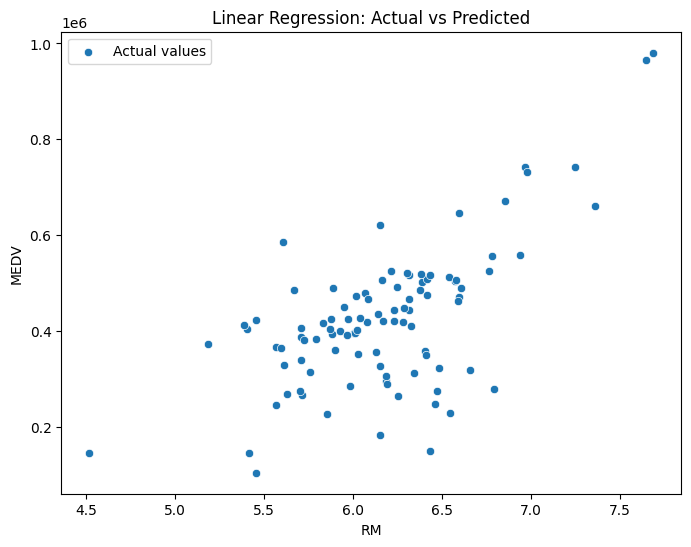

In [20]:
#visualize regression line with RM as the feature for simplicity
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test['RM'], y=y_test, label='Actual values')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.legend()
plt.show()

In [ ]:
"""Based on the evaluation of the model using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared, the model’s performance can be summarized as follows:

Mean Absolute Error (MAE): This metric gives the average magnitude of the errors between the actual and predicted values. A lower MAE indicates that the model's predictions are closer to the actual values on average.

Mean Squared Error (MSE): MSE penalizes larger errors more heavily than MAE. If the MSE is low, it suggests that the model has few large errors, indicating it fits the data well.

R-squared (R²): R-squared tells us how much of the variation in the target variable (MEDV) is explained by the model. A higher R² value (closer to 1) suggests that the model does a good job of explaining the variance in the target. If R² is significantly lower, it indicates that the model may not be capturing important relationships in the data.

"""